RFM 분석 실습
- Recency: 얼마나 최근에 구매했는가
- Frequency: 얼마나 자주 구매했는가
- Monetary: 얼마나 많은 금액을 지출했는가

### 고객 분석
- InvoiceNo: 거래 번호
- StockCode: 상품 코드
- Description: 상품명 
- Quantity: 수량
- InvoiceDate: 거래 날짜
- UnitPrice: 상품 단가
- CustomerID: 고객 번호
- Country: 국가명

- InvoiceNo: 거래 번호
- StockCode: 상품 코드
- Description: 상품명 
- Quantity: 수량
- InvoiceDate: 거래 날짜 
- UnitPrice: 상품 단가 
- CustomerID: 고객 번호
- Country: 국가명

Recency: 얼마나 최근에 구매했는가 (거래 날짜 확인)  
Frequency: 얼마나 자주 구매했는가 (customerID, 거래 번호)  
Monetary: 얼마나 많은 금액을 지출했는가 (수량, 상품 단가)  


In [1]:
# 데이터 가져오기

In [2]:
import pandas as pd
import numpy as np

path = './datasets/customer_invoice_data.csv'
ci_df = pd.read_csv(path)

ci_df

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,12/1/2010 8:26,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,12/1/2010 8:26,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
...,...,...,...,...,...,...,...,...
541904,581587,22613,PACK OF 20 SPACEBOY NAPKINS,12,12/9/2011 12:50,0.85,12680.0,France
541905,581587,22899,CHILDREN'S APRON DOLLY GIRL,6,12/9/2011 12:50,2.10,12680.0,France
541906,581587,23254,CHILDRENS CUTLERY DOLLY GIRL,4,12/9/2011 12:50,4.15,12680.0,France
541907,581587,23255,CHILDRENS CUTLERY CIRCUS PARADE,4,12/9/2011 12:50,4.15,12680.0,France


In [3]:
ci_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   InvoiceNo    541909 non-null  object 
 1   StockCode    541909 non-null  object 
 2   Description  540455 non-null  object 
 3   Quantity     541909 non-null  int64  
 4   InvoiceDate  541909 non-null  object 
 5   UnitPrice    541909 non-null  float64
 6   CustomerID   406829 non-null  float64
 7   Country      541909 non-null  object 
dtypes: float64(2), int64(1), object(5)
memory usage: 33.1+ MB


In [4]:
# 중복행
# 이상치
# 결손데이터


In [5]:
# 이상치 제거
# 1. Quantity 음수 는 제거 (완료)
# 2. CustomerID 없는 것 제거 (x)

In [6]:
# 필요 데이터 생성
ci_need_df = ci_df[['InvoiceNo','StockCode','Quantity','InvoiceDate','UnitPrice','CustomerID']]
ci_need_df = ci_need_df.copy()
ci_need_df

# 데이터 중복 유무 확인
# ci_need_df.value_counts()

,InvoiceNo,StockCode,Quantity,InvoiceDate,UnitPrice,CustomerID
0,536365,85123A,6,12/1/2010 8:26,2.55,17850.0
1,536365,71053,6,12/1/2010 8:26,3.39,17850.0
2,536365,84406B,8,12/1/2010 8:26,2.75,17850.0
3,536365,84029G,6,12/1/2010 8:26,3.39,17850.0
4,536365,84029E,6,12/1/2010 8:26,3.39,17850.0
...,...,...,...,...,...,...
541904,581587,22613,12,12/9/2011 12:50,0.85,12680.0
541905,581587,22899,6,12/9/2011 12:50,2.10,12680.0
541906,581587,23254,4,12/9/2011 12:50,4.15,12680.0
541907,581587,23255,4,12/9/2011 12:50,4.15,12680.0


In [7]:
# 중복행 검사
ci_need_df[ci_need_df.duplicated()]

# 중복행에서 하나만 남기고 삭제
ci_need_df = ci_need_df.drop_duplicates()
ci_need_df

# 중복행 제거 완료
ci_need_df.duplicated().sum()
ci_need_df

,InvoiceNo,StockCode,Quantity,InvoiceDate,UnitPrice,CustomerID
0,536365,85123A,6,12/1/2010 8:26,2.55,17850.0
1,536365,71053,6,12/1/2010 8:26,3.39,17850.0
2,536365,84406B,8,12/1/2010 8:26,2.75,17850.0
3,536365,84029G,6,12/1/2010 8:26,3.39,17850.0
4,536365,84029E,6,12/1/2010 8:26,3.39,17850.0
...,...,...,...,...,...,...
541904,581587,22613,12,12/9/2011 12:50,0.85,12680.0
541905,581587,22899,6,12/9/2011 12:50,2.10,12680.0
541906,581587,23254,4,12/9/2011 12:50,4.15,12680.0
541907,581587,23255,4,12/9/2011 12:50,4.15,12680.0


In [8]:
# 결측치 확인
ci_need_df.isna().sum()


# 현재 CustomerID 가 결측치만 있기 떄문에 해당 결측치에 대한 InvoiceNo 를 확인 
# 해당 InvoiceNo를 통해 CustomerID 가 있는지 확인
# 데이터가 있는 경우 데이터값 변경, 없으면 결측치로 구분하고 전체 삭제

# 결측치 데이터 True 인 값 확인
missing_customer_df = ci_need_df[ci_need_df['CustomerID'].isna()]
missing_customer_df

# id 를 배열 형태로 변경
missing_invoice_nos = missing_customer_df['InvoiceNo'].unique()
missing_invoice_nos

# InvoiceNo 기준으로 CustomerID가 있는 행들을 필터링
customer_ids_for_invoices = ci_need_df[ci_need_df['InvoiceNo'].isin(missing_invoice_nos) & ci_need_df['CustomerID'].notna()]
customer_ids_for_invoices

# 확인하기 위해 InvoiceNo와 CustomerID만 출력
customer_ids_exist = customer_ids_for_invoices[['InvoiceNo', 'CustomerID']].drop_duplicates()
customer_ids_exist

# 확인 결과 CustomerID 가 없는 경우 CustomerID를 알 수 없기 떄문에 결측치 행 삭제
non_customer = missing_customer_df.index
non_customer

ci_need_df = ci_need_df.drop(non_customer, axis=0).reset_index(drop=True)
display(ci_need_df)


,InvoiceNo,StockCode,Quantity,InvoiceDate,UnitPrice,CustomerID
0,536365,85123A,6,12/1/2010 8:26,2.55,17850.0
1,536365,71053,6,12/1/2010 8:26,3.39,17850.0
2,536365,84406B,8,12/1/2010 8:26,2.75,17850.0
3,536365,84029G,6,12/1/2010 8:26,3.39,17850.0
4,536365,84029E,6,12/1/2010 8:26,3.39,17850.0
...,...,...,...,...,...,...
401597,581587,22613,12,12/9/2011 12:50,0.85,12680.0
401598,581587,22899,6,12/9/2011 12:50,2.10,12680.0
401599,581587,23254,4,12/9/2011 12:50,4.15,12680.0
401600,581587,23255,4,12/9/2011 12:50,4.15,12680.0


In [9]:
# RFM점수 측정

# 데이터 중복 값에 대하여 Quantity* UnitPrice => sum  하여 하나로 합치기

# * 이전 quantity, UnitPrice 음수에 대하여 제거  531285
ci_need_df = ci_need_df[~ci_need_df['Quantity'] < 0]  
ci_need_df = ci_need_df[ci_need_df['UnitPrice'] >= 0] 

# RFM 중 Monetary 데이터 프레임 생성(Monentary)

ci_need_df['ProductMultiply'] = ci_need_df['Quantity'].multiply(ci_need_df['UnitPrice'])

ci_need_rfm_m_df = ci_need_df[['InvoiceNo','ProductMultiply']]
ci_need_rfm_m_df.columns = ['InvoiceNo','Monetary']

ci_need_rfm_m_df

# 송장번호를 Group 을 하여 같은 송장번호인 경우 합을 구함
ci_need_rfm_m_df = ci_need_rfm_m_df.groupby('InvoiceNo').sum().reset_index()
ci_need_rfm_m_df

# 위에서 음수값을 제외 했지만 해당 내역에 대해서 실제로 환불 된 것으로 판단하여 해당 데이터 삭제
ci_need_df = ci_need_df[ci_need_df['InvoiceNo']!='581483']
ci_need_df

,InvoiceNo,StockCode,Quantity,InvoiceDate,UnitPrice,CustomerID,ProductMultiply
0,536365,85123A,6,12/1/2010 8:26,2.55,17850.0,15.30
1,536365,71053,6,12/1/2010 8:26,3.39,17850.0,20.34
2,536365,84406B,8,12/1/2010 8:26,2.75,17850.0,22.00
3,536365,84029G,6,12/1/2010 8:26,3.39,17850.0,20.34
4,536365,84029E,6,12/1/2010 8:26,3.39,17850.0,20.34
...,...,...,...,...,...,...,...
401597,581587,22613,12,12/9/2011 12:50,0.85,12680.0,10.20
401598,581587,22899,6,12/9/2011 12:50,2.10,12680.0,12.60
401599,581587,23254,4,12/9/2011 12:50,4.15,12680.0,16.60
401600,581587,23255,4,12/9/2011 12:50,4.15,12680.0,16.60


In [10]:
# 날짜를 datetime 형식으로 변경 ()
ci_need_df['InvoiceDate'] = pd.to_datetime(ci_need_df['InvoiceDate'])
ci_need_df['InvoiceDate']

# 송장번호 기간 변경오늘(1/10/2011 10:04)로부터 지난 구매 날짜 구하기
# InvoiceDate 최대 날짜로부터 지난 구매 날짜 변경하기 (Recency)
InvoiceDate_max = ci_need_df['InvoiceDate'].max()
InvoiceDate_max

ci_need_df['InvoiceDate'] = pd.to_datetime(ci_need_df['InvoiceDate']).apply(lambda x: (pd.to_datetime(InvoiceDate_max ) - x).days)
ci_need_rfm_r_df = ci_need_df[['InvoiceNo','InvoiceDate']]
# RFM 중 Recency 데이터 프레임 생성 
ci_need_rfm_r_df.columns = ['InvoiceNo','Recency']
ci_need_rfm_r_df

# 송장번호를 Group 을 하여 같은 송장번호인 경우 최소 값을 구함
ci_need_rfm_r_df = ci_need_rfm_r_df.groupby('InvoiceNo').min().reset_index()
ci_need_rfm_r_df

,InvoiceNo,Recency
0,536365,373
1,536366,373
2,536367,373
3,536368,373
4,536369,373
...,...,...
18530,581583,0
18531,581584,0
18532,581585,0
18533,581586,0


In [11]:
# 송장번호 중복값 Count 확인(Frequency)
ci_need_df[['InvoiceNo']].value_counts().reset_index()
# RFM 중 Frequency 데이터 프레임 생성
ci_need_rfm_f_df = ci_need_df[['InvoiceNo']].value_counts().reset_index()
ci_need_rfm_f_df

,InvoiceNo,count
0,576339,542
1,579196,533
2,580727,529
3,578270,442
4,573576,435
...,...,...
18530,556885,1
18531,556842,1
18532,544170,1
18533,556831,1


In [12]:
# 전체 데이더에 대하여 RFM 데이터 프레임 생성
ci_need_rfm_df = pd.merge(ci_need_rfm_m_df, ci_need_rfm_r_df, on ='InvoiceNo')
ci_need_rfm_df = pd.merge(ci_need_rfm_df, ci_need_rfm_f_df, on ='InvoiceNo')
ci_need_rfm_df.columns = ['InvoiceNo','Monetary','Recency','Frequency']
ci_need_rfm_df


,InvoiceNo,Monetary,Recency,Frequency
0,536365,139.12,373,7
1,536366,22.20,373,2
2,536367,278.73,373,12
3,536368,70.05,373,4
4,536369,17.85,373,1
...,...,...,...,...
18530,581583,124.60,0,2
18531,581584,140.64,0,2
18532,581585,329.05,0,21
18533,581586,339.20,0,4


In [13]:
# rfm 데이터 프레임에 정규화 식 적용
from sklearn.preprocessing import MinMaxScaler

scale = MinMaxScaler()
ci_need_rfm_df[['Recency', 'Frequency', 'Monetary']]= scale.fit_transform(ci_need_rfm_df[['Recency', 'Frequency', 'Monetary']])
ci_need_rfm_df

,InvoiceNo,Monetary,Recency,Frequency
0,536365,0.001802,1.0,0.011091
1,536366,0.000288,1.0,0.001848
2,536367,0.003611,1.0,0.020333
3,536368,0.000908,1.0,0.005545
4,536369,0.000231,1.0,0.000000
...,...,...,...,...
18530,581583,0.001614,0.0,0.001848
18531,581584,0.001822,0.0,0.001848
18532,581585,0.004263,0.0,0.036969
18533,581586,0.004395,0.0,0.005545


In [14]:
# Recency 정규 화 시 0 인 값이 가장 큰 값을 가져야 하기 때문에 1을 빼준 값 확인
ci_need_rfm_df['Recency'] = 1 -ci_need_rfm_df['Recency']
ci_need_rfm_df

,InvoiceNo,Monetary,Recency,Frequency
0,536365,0.001802,0.0,0.011091
1,536366,0.000288,0.0,0.001848
2,536367,0.003611,0.0,0.020333
3,536368,0.000908,0.0,0.005545
4,536369,0.000231,0.0,0.000000
...,...,...,...,...
18530,581583,0.001614,1.0,0.001848
18531,581584,0.001822,1.0,0.001848
18532,581585,0.004263,1.0,0.036969
18533,581586,0.004395,1.0,0.005545


In [15]:
# RFM 점수 계산 
ci_need_rfm_df['RFMScore'] = ci_need_rfm_df[['Recency', 'Frequency','Monetary']].sum(axis=1)
ci_need_rfm_df

,InvoiceNo,Monetary,Recency,Frequency,RFMScore
0,536365,0.001802,0.0,0.011091,0.012893
1,536366,0.000288,0.0,0.001848,0.002136
2,536367,0.003611,0.0,0.020333,0.023944
3,536368,0.000908,0.0,0.005545,0.006453
4,536369,0.000231,0.0,0.000000,0.000231
...,...,...,...,...,...
18530,581583,0.001614,1.0,0.001848,1.003463
18531,581584,0.001822,1.0,0.001848,1.003671
18532,581585,0.004263,1.0,0.036969,1.041232
18533,581586,0.004395,1.0,0.005545,1.009940


In [16]:
# 원본(필요) 데이터에 RFM 데이터 적용
ci_need_df = pd.merge(ci_df, ci_need_rfm_df, on ='InvoiceNo')
ci_need_df

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Monetary,Recency,Frequency,RFMScore
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,12/1/2010 8:26,2.55,17850.0,United Kingdom,0.001802,0.0,0.011091,0.012893
1,536365,71053,WHITE METAL LANTERN,6,12/1/2010 8:26,3.39,17850.0,United Kingdom,0.001802,0.0,0.011091,0.012893
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,12/1/2010 8:26,2.75,17850.0,United Kingdom,0.001802,0.0,0.011091,0.012893
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,12/1/2010 8:26,3.39,17850.0,United Kingdom,0.001802,0.0,0.011091,0.012893
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,12/1/2010 8:26,3.39,17850.0,United Kingdom,0.001802,0.0,0.011091,0.012893
...,...,...,...,...,...,...,...,...,...,...,...,...
397918,581587,22613,PACK OF 20 SPACEBOY NAPKINS,12,12/9/2011 12:50,0.85,12680.0,France,0.003232,1.0,0.025878,1.029110
397919,581587,22899,CHILDREN'S APRON DOLLY GIRL,6,12/9/2011 12:50,2.10,12680.0,France,0.003232,1.0,0.025878,1.029110
397920,581587,23254,CHILDRENS CUTLERY DOLLY GIRL,4,12/9/2011 12:50,4.15,12680.0,France,0.003232,1.0,0.025878,1.029110
397921,581587,23255,CHILDRENS CUTLERY CIRCUS PARADE,4,12/9/2011 12:50,4.15,12680.0,France,0.003232,1.0,0.025878,1.029110


In [19]:
# level 구분위를 위한 사분위 확인
import numpy as np

display(ci_need_df[['RFMScore']].describe().T)


l1, l2, l3, l4 = np.percentile(ci_need_df['RFMScore'], [20, 40 , 60 , 90])
print(l1, l2, l3, l4)

,count,mean,std,min,25%,50%,75%,max
RFMScore,397923.0,0.694236,0.341522,0.000064,0.421802,0.730227,0.963724,2.083703


0.35982874430070544 0.6074860251338015 0.8469242786406741 1.0638790253806467


In [20]:
def get_level(x):
    if x <= l1:
        return 5
    if x > l1 and x <= l2:
        return 4
    if x > l2 and x <= l3:
        return 3
    if x > l3 and x <= l4:
        return 2
    return 1

In [21]:
ci_need_df['Level'] = ci_need_df['RFMScore'].apply(get_level)
ci_need_df

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Monetary,Recency,Frequency,RFMScore,Level
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,12/1/2010 8:26,2.55,17850.0,United Kingdom,0.001802,0.0,0.011091,0.012893,5
1,536365,71053,WHITE METAL LANTERN,6,12/1/2010 8:26,3.39,17850.0,United Kingdom,0.001802,0.0,0.011091,0.012893,5
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,12/1/2010 8:26,2.75,17850.0,United Kingdom,0.001802,0.0,0.011091,0.012893,5
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,12/1/2010 8:26,3.39,17850.0,United Kingdom,0.001802,0.0,0.011091,0.012893,5
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,12/1/2010 8:26,3.39,17850.0,United Kingdom,0.001802,0.0,0.011091,0.012893,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...
397918,581587,22613,PACK OF 20 SPACEBOY NAPKINS,12,12/9/2011 12:50,0.85,12680.0,France,0.003232,1.0,0.025878,1.029110,2
397919,581587,22899,CHILDREN'S APRON DOLLY GIRL,6,12/9/2011 12:50,2.10,12680.0,France,0.003232,1.0,0.025878,1.029110,2
397920,581587,23254,CHILDRENS CUTLERY DOLLY GIRL,4,12/9/2011 12:50,4.15,12680.0,France,0.003232,1.0,0.025878,1.029110,2
397921,581587,23255,CHILDRENS CUTLERY CIRCUS PARADE,4,12/9/2011 12:50,4.15,12680.0,France,0.003232,1.0,0.025878,1.029110,2


In [22]:
# RFM 점수를 이용한 등급 계산

ci_need_df['Level'] = ci_need_df['Level'].replace([5, 4, 3, 2, 1], ['Bronze', 'Silver', 'Gold', 'Diamond', 'VVIP'])
ci_need_df

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Monetary,Recency,Frequency,RFMScore,Level
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,12/1/2010 8:26,2.55,17850.0,United Kingdom,0.001802,0.0,0.011091,0.012893,Bronze
1,536365,71053,WHITE METAL LANTERN,6,12/1/2010 8:26,3.39,17850.0,United Kingdom,0.001802,0.0,0.011091,0.012893,Bronze
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,12/1/2010 8:26,2.75,17850.0,United Kingdom,0.001802,0.0,0.011091,0.012893,Bronze
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,12/1/2010 8:26,3.39,17850.0,United Kingdom,0.001802,0.0,0.011091,0.012893,Bronze
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,12/1/2010 8:26,3.39,17850.0,United Kingdom,0.001802,0.0,0.011091,0.012893,Bronze
...,...,...,...,...,...,...,...,...,...,...,...,...,...
397918,581587,22613,PACK OF 20 SPACEBOY NAPKINS,12,12/9/2011 12:50,0.85,12680.0,France,0.003232,1.0,0.025878,1.029110,Diamond
397919,581587,22899,CHILDREN'S APRON DOLLY GIRL,6,12/9/2011 12:50,2.10,12680.0,France,0.003232,1.0,0.025878,1.029110,Diamond
397920,581587,23254,CHILDRENS CUTLERY DOLLY GIRL,4,12/9/2011 12:50,4.15,12680.0,France,0.003232,1.0,0.025878,1.029110,Diamond
397921,581587,23255,CHILDRENS CUTLERY CIRCUS PARADE,4,12/9/2011 12:50,4.15,12680.0,France,0.003232,1.0,0.025878,1.029110,Diamond


In [23]:
ci_need_df['Level'].value_counts()

Level
Diamond    119414
Bronze      79606
Gold        79576
Silver      79573
VVIP        39754
Name: count, dtype: int64

In [24]:
# 원하는 데이터를 추출하기 위해 컬럼끼리 groupby 할것
ci_need_df.columns

# Level  Country 나라별 level count
# Level InvoiceDate 날짜별 level count
# Level InvoiceDate 
# CustomerID, Country , level 나라별 고객 레벨?

Index(['InvoiceNo', 'StockCode', 'Description', 'Quantity', 'InvoiceDate',
       'UnitPrice', 'CustomerID', 'Country', 'Monetary', 'Recency',
       'Frequency', 'RFMScore', 'Level'],
      dtype='object')

In [25]:
# 원할한 날짜 계산을 위해 시간을 제거

# InvoiceDate 열을 datetime 객체로 변환
ci_need_df['InvoiceDate'] = pd.to_datetime(ci_need_df['InvoiceDate'])

# date 부분만 추출하여 새로운 열에 저장
ci_need_df['InvoiceDateOnly'] = ci_need_df['InvoiceDate'].dt.date
ci_need_df

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Monetary,Recency,Frequency,RFMScore,Level,InvoiceDateOnly
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom,0.001802,0.0,0.011091,0.012893,Bronze,2010-12-01
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,0.001802,0.0,0.011091,0.012893,Bronze,2010-12-01
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom,0.001802,0.0,0.011091,0.012893,Bronze,2010-12-01
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,0.001802,0.0,0.011091,0.012893,Bronze,2010-12-01
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,0.001802,0.0,0.011091,0.012893,Bronze,2010-12-01
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
397918,581587,22613,PACK OF 20 SPACEBOY NAPKINS,12,2011-12-09 12:50:00,0.85,12680.0,France,0.003232,1.0,0.025878,1.029110,Diamond,2011-12-09
397919,581587,22899,CHILDREN'S APRON DOLLY GIRL,6,2011-12-09 12:50:00,2.10,12680.0,France,0.003232,1.0,0.025878,1.029110,Diamond,2011-12-09
397920,581587,23254,CHILDRENS CUTLERY DOLLY GIRL,4,2011-12-09 12:50:00,4.15,12680.0,France,0.003232,1.0,0.025878,1.029110,Diamond,2011-12-09
397921,581587,23255,CHILDRENS CUTLERY CIRCUS PARADE,4,2011-12-09 12:50:00,4.15,12680.0,France,0.003232,1.0,0.025878,1.029110,Diamond,2011-12-09


In [26]:
# 필요없는 데이터 feature 제거
ci_need_df = ci_need_df[['InvoiceNo','CustomerID', 'Country', 'Monetary', 'Recency','Frequency', 'RFMScore', 'Level', 'InvoiceDateOnly']]
ci_need_df

,InvoiceNo,CustomerID,Country,Monetary,Recency,Frequency,RFMScore,Level,InvoiceDateOnly
0,536365,17850.0,United Kingdom,0.001802,0.0,0.011091,0.012893,Bronze,2010-12-01
1,536365,17850.0,United Kingdom,0.001802,0.0,0.011091,0.012893,Bronze,2010-12-01
2,536365,17850.0,United Kingdom,0.001802,0.0,0.011091,0.012893,Bronze,2010-12-01
3,536365,17850.0,United Kingdom,0.001802,0.0,0.011091,0.012893,Bronze,2010-12-01
4,536365,17850.0,United Kingdom,0.001802,0.0,0.011091,0.012893,Bronze,2010-12-01
...,...,...,...,...,...,...,...,...,...
397918,581587,12680.0,France,0.003232,1.0,0.025878,1.029110,Diamond,2011-12-09
397919,581587,12680.0,France,0.003232,1.0,0.025878,1.029110,Diamond,2011-12-09
397920,581587,12680.0,France,0.003232,1.0,0.025878,1.029110,Diamond,2011-12-09
397921,581587,12680.0,France,0.003232,1.0,0.025878,1.029110,Diamond,2011-12-09


In [27]:
ci_need_df = ci_need_df.groupby('CustomerID').max().reset_index()

# 날짜 순으로 정렬
ci_need_df = ci_need_df.sort_values('InvoiceDateOnly')
ci_need_df

,CustomerID,InvoiceNo,Country,Monetary,Recency,Frequency,RFMScore,Level,InvoiceDateOnly
2207,15350.0,536534,United Kingdom,0.001498,0.002681,0.007394,0.011573,Bronze,2010-12-01
1393,14237.0,536529,United Kingdom,0.002086,0.002681,0.014787,0.019554,Bronze,2010-12-01
546,13065.0,536590,United Kingdom,0.002667,0.002681,0.024030,0.029378,Bronze,2010-12-01
2716,16048.0,536568,United Kingdom,0.003257,0.002681,0.011091,0.017029,Bronze,2010-12-01
2884,16274.0,536569,United Kingdom,0.004557,0.002681,0.118299,0.125538,Bronze,2010-12-01
...,...,...,...,...,...,...,...,...,...
2543,15804.0,581585,United Kingdom,0.007774,1.000000,0.060998,1.041232,Silver,2011-12-09
3137,16626.0,581567,United Kingdom,0.010310,1.000000,0.085028,1.025375,Silver,2011-12-09
137,12518.0,581494,Germany,0.006801,1.000000,0.059150,1.035817,Gold,2011-12-09
3824,17581.0,581582,United Kingdom,0.017507,1.000000,0.105360,1.065312,VVIP,2011-12-09


<Axes: xlabel='Level', ylabel='count'>

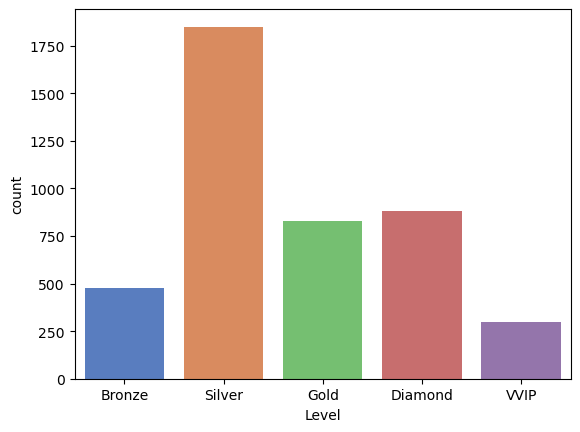

In [28]:
# 구매 빈도에 따른 고객 등급 분류
import matplotlib.pyplot as plt
import seaborn as sns

order_columns = ['Bronze', 'Silver', 'Gold', 'Diamond', 'VVIP']
sns.countplot(x='Level', data=ci_need_df, palette='muted', order = order_columns)

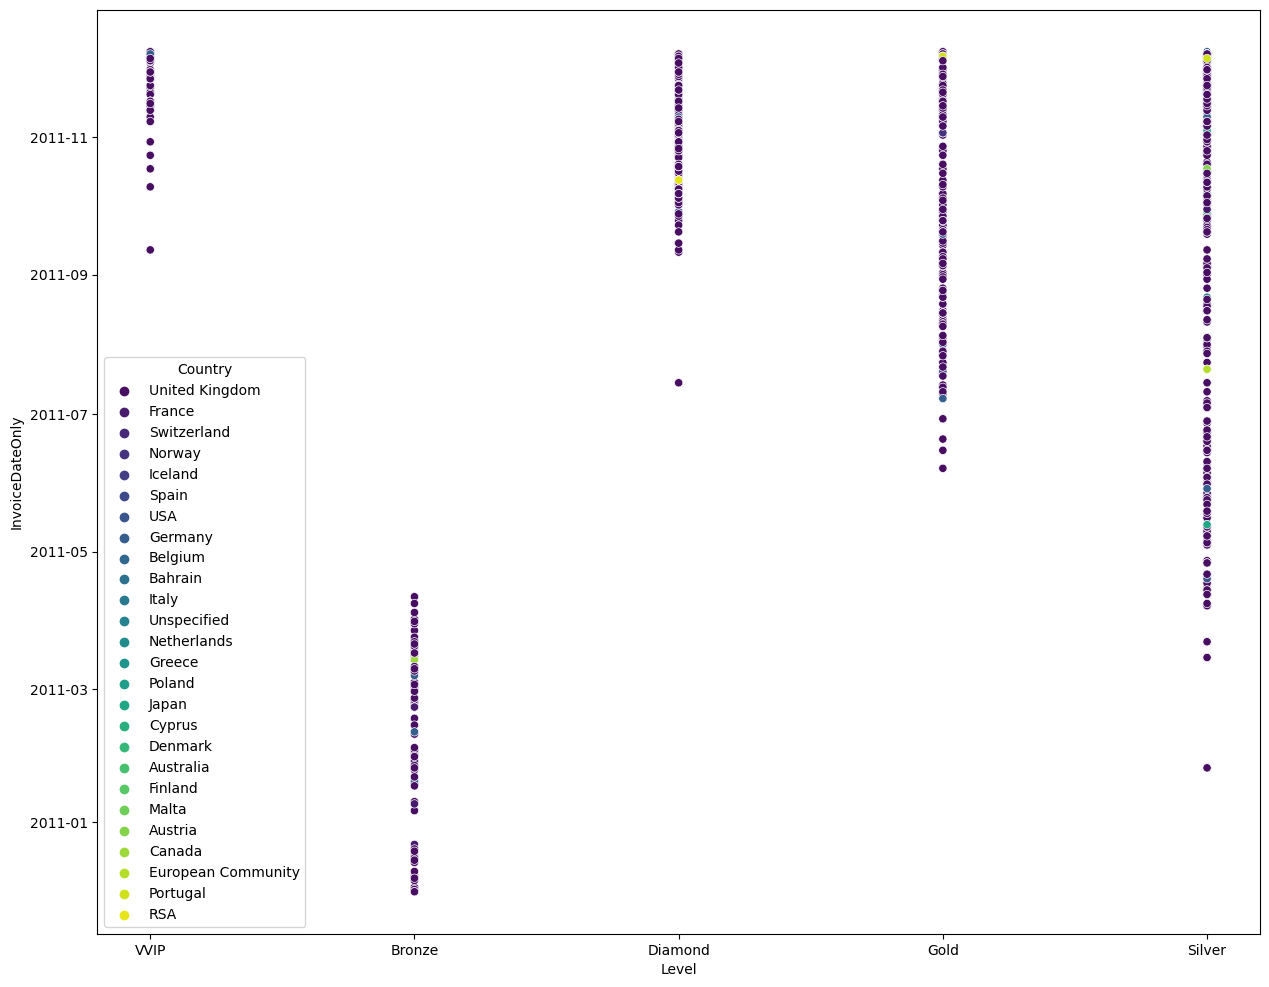

In [37]:
# 랜덤한 고객 1000 명을 추출하여 날짜에 따른 등급별 나라 산포도 작성

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# 랜덤하게 1000개의 샘플을 선택합니다.
sample_df =ci_need_df.sample(n=1000, random_state=1)


plt.figure(figsize=(15, 12))
sns.scatterplot(data=sample_df, x='Level', y='InvoiceDateOnly', hue='Country', palette='viridis')

plt.xlabel('Level')  
plt.ylabel('InvoiceDateOnly')  
plt.gca().invert_yaxis()
plt.gca().invert_xaxis()
plt.show()  

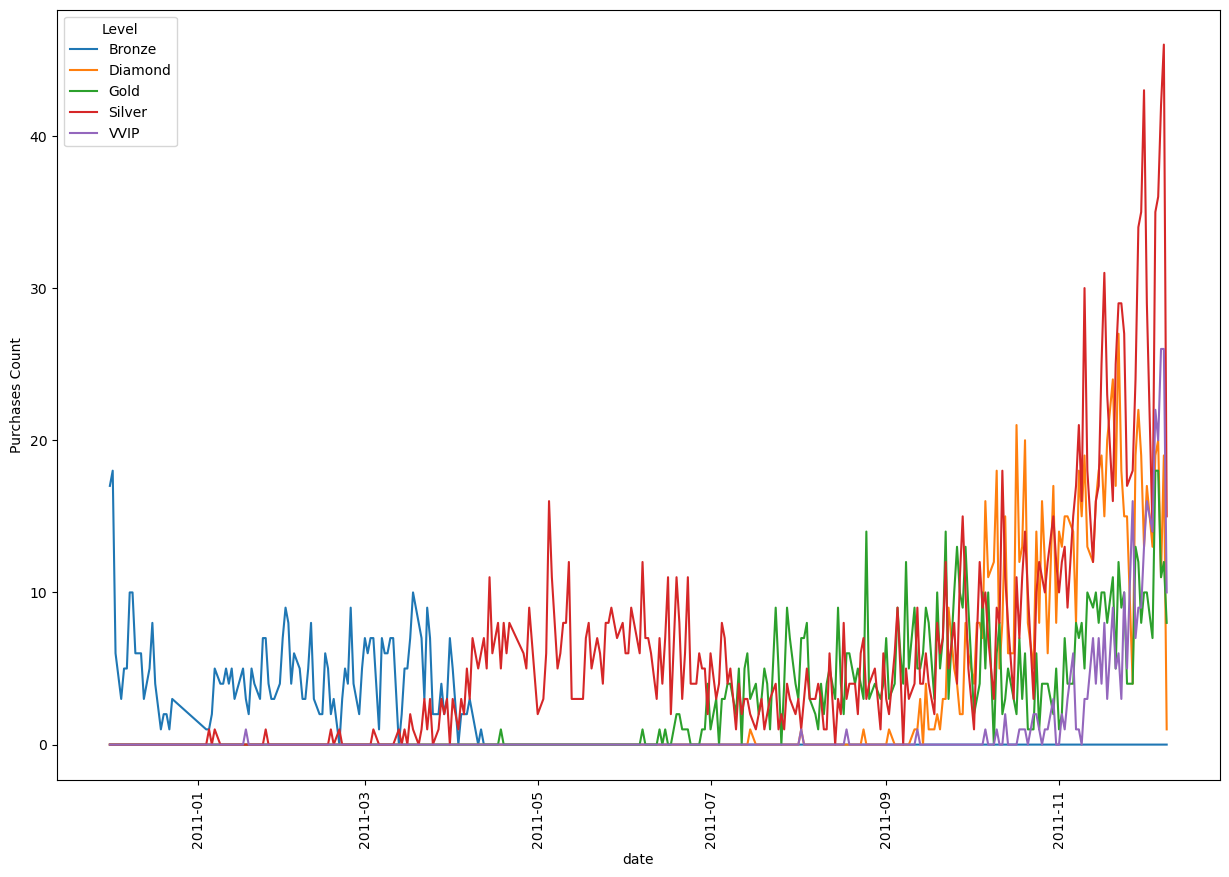

In [40]:
# 고객 등급에 따른 구매 빈도 확인
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# 데이터 준비: 'ci_need_di'에는 'CustomerLevel', 'PurchaseDate', 'Country' 열이 있다고 가정합니다.

# 날짜와 고객 등급별로 데이터를 그룹화하고 개수를 세어 집계합니다.
date_level_df = ci_need_df.groupby(['InvoiceDateOnly', 'Level']).size().reset_index(name='Count')

# pivot_table을 사용하여 데이터를 재구조화합니다.
pivot_df = date_level_df.pivot_table(index='InvoiceDateOnly', columns='Level', values='Count', fill_value=0)

# 데이터를 선 그래프로 그립니다.
plt.figure(figsize=(15, 10))
for level in pivot_df.columns:
    plt.plot(pivot_df.index, pivot_df[level], marker='', label=level)

plt.legend(title='Level')
plt.xlabel('date')
plt.ylabel('Purchases Count')
plt.xticks(rotation=90)
plt.show()


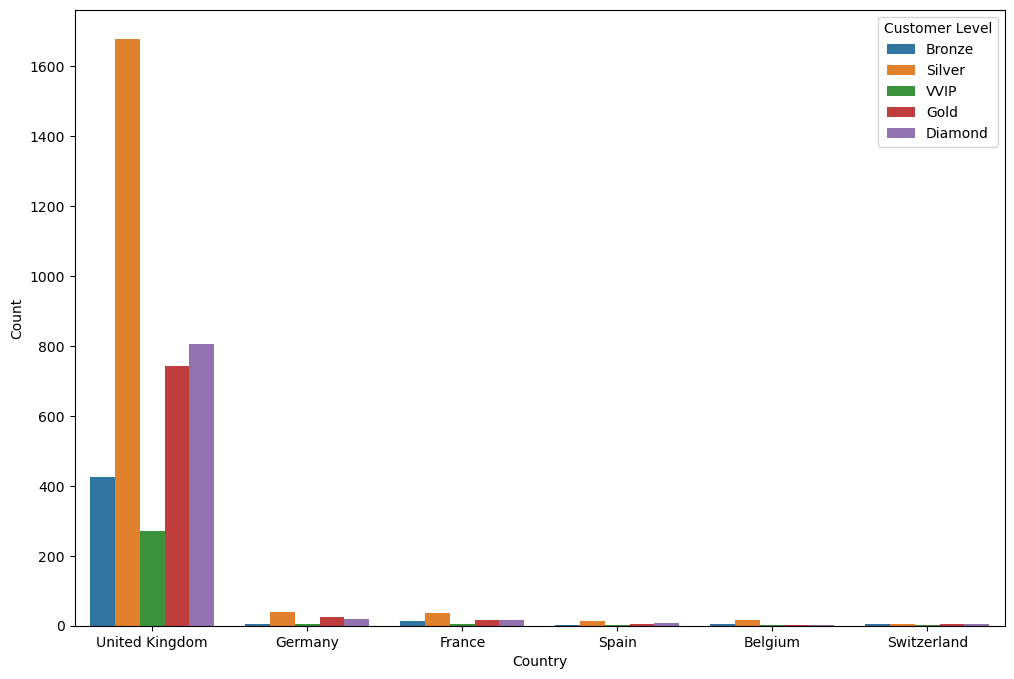

In [42]:
# 나라별 구매 고객이 20 이상인 나라 확인 

# 국가별 데이터 카운트를 계산합니다.
country_counts = ci_need_df['Country'].value_counts()

# 카운트가 50 이상인 국가만 필터링합니다.
countries_over= country_counts[country_counts >= 20].index

# 원본 데이터프레임에서 카운트가 50 이상인 국가들에 해당하는 데이터만 필터링합니다.
filtered_df = ci_need_df[ci_need_df['Country'].isin(countries_over)]

# 필터링된 데이터에 대해 그래프를 그립니다.
plt.figure(figsize=(12, 8))
sns.countplot(data=filtered_df, x='Country', hue='Level', order=filtered_df['Country'].value_counts().index)
plt.xlabel('Country')
plt.ylabel('Count')
plt.legend(title='Customer Level', loc='upper right')
plt.show()


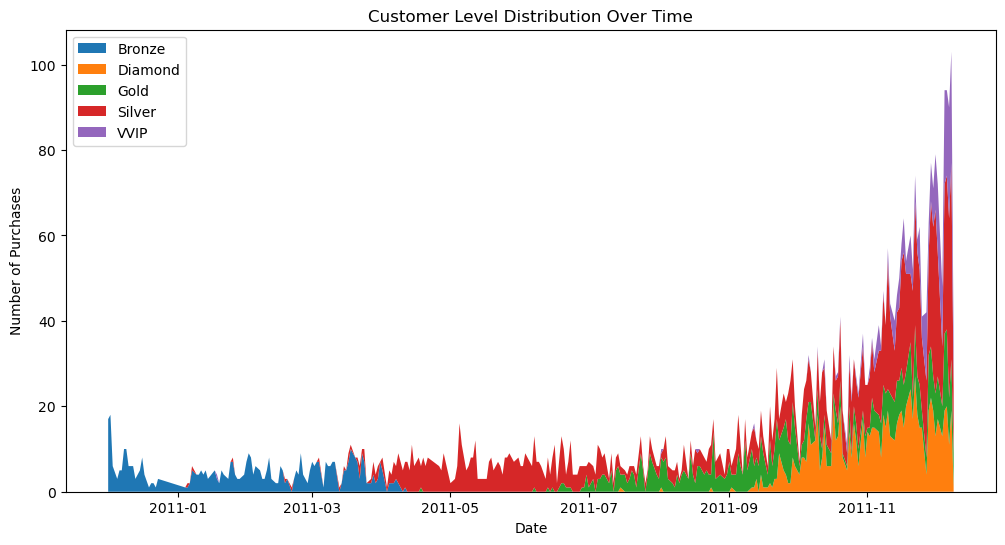

In [32]:
# 날짜별 고객 구매 (등급)빈도 확인

# 날짜와 고객 등급별로 데이터를 그룹화하고 개수를 세어 집계
date_level_counts = ci_need_df.groupby(['InvoiceDateOnly', 'Level']).size().unstack(fill_value=0)

# 데이터를 선 그래프로 그립니다.
plt.figure(figsize=(12, 6))
plt.stackplot(date_level_counts.index, date_level_counts.T, labels=date_level_counts.columns)
plt.title('Customer Level Distribution Over Time')
plt.xlabel('Date')
plt.ylabel('Number of Purchases')
plt.legend(loc='upper left')
plt.show()

#### 마케팅 전략

- 지역 타겟 마케팅  
현재 해당 데이터 확인 결과 고객 등급과 관계없이 영국에서 높은 구매 양상을 보이고 있습니다.
그 이외에 독일, 프랑스 지역에서 구매율이 있는 것으로 보아 중서부 유럽을 타겟으로 수출을 하는 전표로 보입니다.
따라서 해당 지역 수출 시 유류비, 또는 환율을 고려하여 시세에 맞는 금액을 측정하여 제품의 가격을 조정할 경우 환율에 의한 시세 차익을 증대 시킬 수 있을 것 으로 기대됩니다.
 

- 등급별 마케팅
데이터를 확인했을 때 고객의 등급은 높은 등급의 고객보다 대중적인 고객의 구매율이 가장 높은 것으로 보이지만,
최상위 등급고객과 그 아래 등급의 고객을 종합하였을 때 대중적인 고객의 구매율과 비슷한 양상을 보이고 있습니다.
따라서 현재 제품을 유지 상위 등급의 고객을 최상위 등급으로 구매 빈도와 재구매율을 높여 수익성을 증대 시킬 수 있도록 유통망에 차질이 없어야 수익을 증대 시킬 것으로 기대됩니다.

- 날짜별 마케팅
현재 2011년 10월을 기점으로 높은 구매율을 보이고 있으며, 과거 2011년 01월 부터 구매된 이력이 있습니다.
이로 보아 소비자의 경우 1분기의 상품 구매율 보다 4분기의 구매율이 높은 것으로 확인됩니다.
따라서 해당 소비 패턴을 봤을 때 상반기에 프로모션을 지속적으로 유지, 발전을 하여 고객의 수를 증대 시킨 후 하반기에 마케팅을 집중하여 가입 또는 구매 고객에 한하여
더 상품 구매를 높일 수 있는 프로모션을 증대하는 것이 좋을 것으로 사료됩니다.

** 특이사항
현제 데이터의 경우 1년 단위의 고객 구매 날짜로 확인되며 최근에 고매한 고객이 RFM 점수가 높이 측정되었을 수 있습니다. 
추가 분석을 위해서 1년의 데이터가 아닌 이외의 년도 데이터 확보 후 추가 분석이 필요합니다.


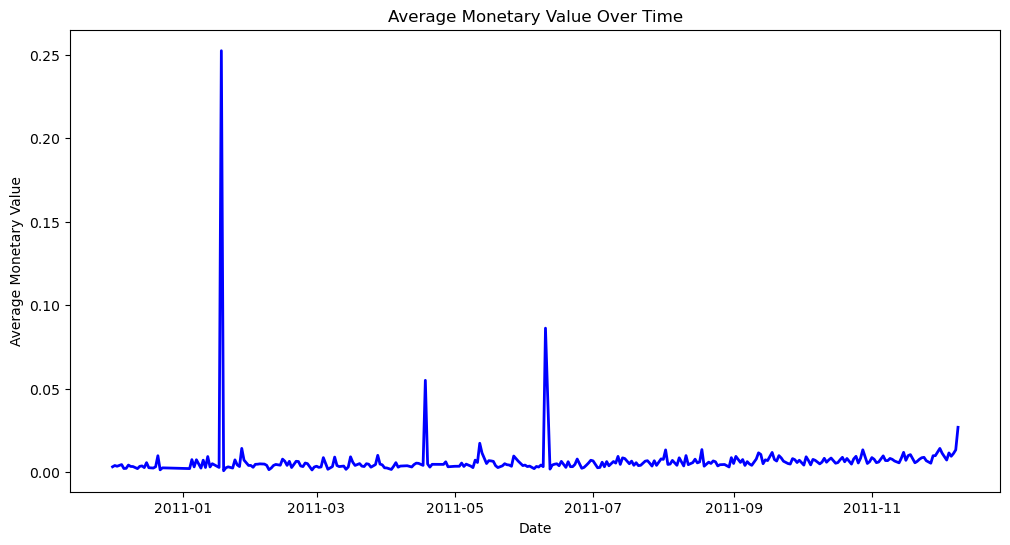

In [33]:
# 날짜별로 `Monetary` 값의 평균을 계산 (구매 금액이 높은 데이터가 있어 해당 데이터 확인 후 맞지 않는 금액이라고 판단 후 미사용)
# 해당 데이터를 추출해봤으나 제품의 금액이 특이사항이 없을 수 있기 떄문에 별도로 제거하지 않음
date_monetary_avg = ci_need_df.groupby('InvoiceDateOnly')['Monetary'].mean().reset_index()

plt.figure(figsize=(12, 6))
plt.plot(date_monetary_avg['InvoiceDateOnly'], date_monetary_avg['Monetary'], marker='', color='blue', linewidth=2)
plt.title('Average Monetary Value Over Time')
plt.xlabel('Date')
plt.ylabel('Average Monetary Value')
# plt.xticks(rotation=45)
plt.show()

In [34]:
ci_need_df.sort_values('Monetary', ascending=False)
ci_need_df[ci_need_df['Monetary'] > 0.1].sort_values(by='InvoiceDateOnly')
ci_df[ci_df['CustomerID'] == 16446.0]
ci_need_df[ci_need_df['Monetary'] >= 1]
ci_df[ci_df['InvoiceNo'] == '541431']

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
61619,541431,23166,MEDIUM CERAMIC TOP STORAGE JAR,74215,1/18/2011 10:01,1.04,12346.0,United Kingdom


In [35]:

# 중복행에 대하여 줄이는 기능 없이 다 출력
# pd.set_option('display.max_rows', None)

# 원복
# pd.reset_option('display.max_rows')
# ci_df[ci_df['InvoiceNo'] =='555524']

In [36]:
# 이상치 제거 전 =-> 후 비교하여 바뀌는 그래프 양상 확인